# *Lecture 5* - 9/04/2024

In the past lectures, we have learnt how to fit a model starting from certain hypothesis and assumptions. In particular, we have studied 4 physical variables that are crucial in the development of a galaxy:
- stellar ages;
- amount of "young stars";
- dust attenuation;
- stellar mass, which also corresponds to the integral of the SFR(t) (stellar formation rate).

Analysing galaxies G1, G2 and G3 we also noticed that not all galaxies are still forming stars, which we can notice from the absence of emission/absorption lines.

To completely describe a galaxy, we will have to consider all the factors at play, meaning to include an SPS (Stellar Population Synthesis) model, a dust model and the nebular emission. In particular, we can't only consider on SPS, but we will use a multitude of them, each one generated at a certain time t and weighted by the Stellar Formation History (SFH), which corresponds to SFR(t).

As there are different possible models of SFH (i.e. constant, raising, falling, burst, quench), we aim to use one which is as generical and with as few parameters as possible, which takes us to:

$$\mathrm{SFR}(t) = e^{-t/\tau}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

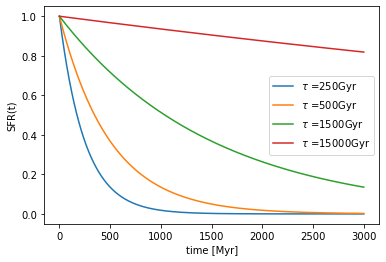

In [19]:
time = np.linspace(0, 3000, 1000)
tau = [250, 500, 1500, 15000]
SFR = [np.exp(-time/t) for t in tau]
SFR = np.array(SFR)

for i in range(len(tau)): plt.plot(time, SFR[i], label = '$\\tau$ =' + str(tau[i]) + 'Gyr')
plt.xlabel('time [Myr]')
plt.ylabel('SFR(t)')
plt.legend()
plt.show()

As $\tau$ increases, SFR tends to a constant model, while if $\tau \ll $ t we obtain an SSP, meaning all the star population is formed in one burst.

The question we want to answer in this lecture is mainly: what are the SFHs of galaxies in the SSDS and how do they relate to other physical properties? 
    

## SDSS and HST
The SDSS is the Sloan Digital Sky Survey, which aims to acquire 3D data of galaxies within the North Galactic Cap with 0.015 < z < $\sim$ 0.15. The empty spots not surveyed in the sky correspond to where the Milky Way is: if we were to point our detector there, we would only see stars. 
    
To map galaxies further away we use the 3D-HST, made with the Hubble telescope mapping a smaller region but with z $\sim$ 3.

## Photometry
To analyse galaxies we won't use spectroscopy, meaning the whole spectrum of the galaxy, but rather photometry. We take 5 filters, each with a specific shape, which select photons: in the end we will have only 5 points which represent the flux of the galaxy in a given photometric band with a value:

$$ <f_{\lambda}> \, = \frac{\int d\lambda f_{\lambda}T_{\lambda}}{\int d\lambda f_{\lambda}}$$

where $f_{\lambda}$ is the flux and $T_{\lambda}$ is the transmission of the spectrum at a given wavelength. This allows us to obtain a low resolution spectrum which is easier to fit, as SDSS encloses the Spectral Energy Distribution of galaxies (and other astrophysical sources) in only five datapoints with their associated uncertainties.

How does photometry work in practice? A section of the sky gets divided in pixels. If a pixel receives a spectrum we apply a filter which selects photons (filters with different shapes accept a different number of photons) and the flux gets measured (in millijenkins). The total flux of the galaxy is then obtained by summing the pixels that compose it. On the contrary, spectroscopy refers to optical fibers which receive the full spectrum of the galaxy, including absorption and emission lines, which we can then use to find z. Another advantage of photometry is that it is easier to calibrate compared to spectroscopy.


## Fitting the points with CIGALE
CIGALE takes our 5 points, together with their uncertainties, from our .fit file and tries several models (based on user configuration) in order to find the most compatible one using the least squares method ($\chi^2$).

In particular, CIGALE works with 2 files:
1. input data
2. configuration file

### CIGALE config file
Before running CIGALE, we will have to modify the configuration file to include 
- the name of input data file,
- the models we want to use to fit the data.

In this case, we want to fit a SFH model (double exponential, sfh2exp), an SSP model (bco3), a dust attenuation law (dustatt_calzleit), emission lines (nebular, not really relevant for this fit but generally physically important), and finally redshifting. The nebular package works by assuming that photons are all absorbed (escape fraction = 0) and then emitted at lower energy, to the point that the UV spectrum is totally dark.

CIGALE will then modify the file and ask us the parameters we want to to use for each model.
1. sfh2exp
   - tau_main (Myr) = 50, 250, 500, 1000, 2500, 5000, 10000, 15000  
   - tau_burst = 50.0
   - age (Myr) = 50, 300, 600, 900, 1500, 2000, 5000, 10000, 12000 <- can't be longer than the universe age ($\sim$ 13700 for CIGALE)
2. bco3
    - imf = 1
    - metallicity = 0.02 <- solar value
3. dustatt
    - E_BVs_young = 0, 0.25, ...... <- in the range \[0, 1)
    - E_BVs_old_factor = 0.44 <- when stars are born, they are embedded in a gas/dust cloud, young stars are attenuated by a gas column which is larger compared to the ones of older stars, as the latters tend to carve out regions of the cloud once they go supernova <- the cloud becomes more and more transparent, on average E(B-V)$_\mathrm{old}$ = 0.44 $\times$ E(B-V)$_\mathrm{young}$
    - UV_bump_amplitude = 0 <- meaning no excess in the UV range due to dust
4. nebular
    - logU = -2.0
    - 2gas = 0.02

### CIGALE output
We can look at the output with TOPCAT and then move onto a larger input file. Some interesting physical quantities to investigate are:
- amount of gas (E(B-V));
- stellar mass (more mass -> older galaxies, use in log scale);
- SFR.

In particular, we have 3 counts of SFR / stellar_mass (measured in Myr / M$_\odot$):
- no label = last point available of SFR, instantaneous;
- 10 Myr = average of the function over the last 10 Myr;
- 100 Myr = average of the function over the last 10 Myr.

We can use any of the three or, even better, bayes.sfh.sfr which does the mean of all the grid points.


### SFR vs stellar mass
Plotting SFR against stellar mass gives us a good idea of the rate based on the age of the galaxy, as older galaxies tend to have more stellar mass. 

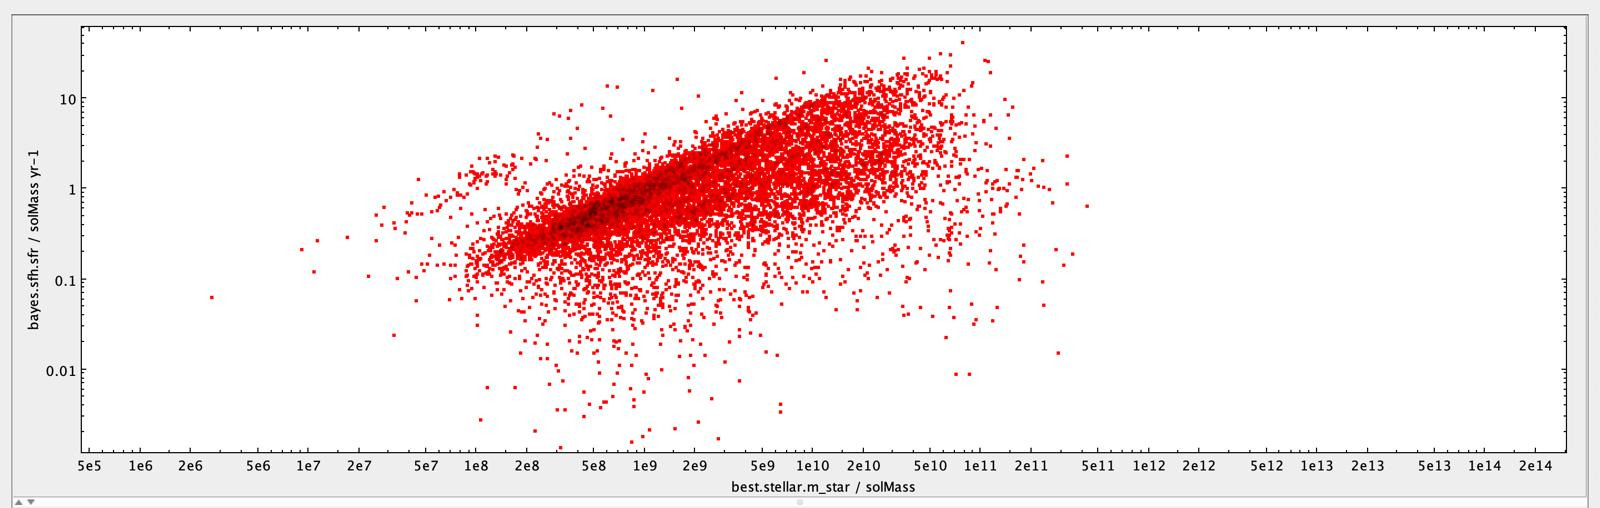

We notice:
- a very narrow main sequence of star forming galaxies,
- that more massive galaxies tend to disperse more easily from the main sequence.

Some questions we may want to ask now are:
- How are the stars formed today corelated to the ones of the past? Does the galaxy have any "knowledge" of its past SFR?
- Why are some galaxies underneath the sequence (passive/quiescent galaxies) and why is this phenomenon more prevalent for larger galaxies?